# **Problem Statement: Customer Segmentation Analysis**

**Problem Statement:** 

You own the mall and want to understand the customers who can quickly converge [Target Customers] so that the insight can be given to the marketing team and plan the strategy accordingly.

## Import libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('drive/My Drive/Mall_Customers.csv')

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.shape

(200, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Visualizations

### Univariate Analysis

Univariate analysis provides an understanding in the characteristics of each feature in the data set. Different characteristics are computed for numerical and categorical data.

For the numerical features characteristics are standard deviation, skewness, kurtosis, percentile, interquartile range (IQR) and range.

In [6]:
stats_num = data.describe()
stats_num.loc['variance'] = data.select_dtypes(np.number).var().tolist()
stats_num.loc['skewness'] = data.select_dtypes(np.number).skew().tolist()
stats_num.loc['kurtosis'] = data.select_dtypes(np.number).kurtosis().tolist()
stats_num.loc['IQR'] = (data.select_dtypes(np.number).quantile(q=0.75) - data.select_dtypes(np.number).quantile(q=0.25)).tolist()
stats_num.loc['range'] = (data.select_dtypes(np.number).max() - data.select_dtypes(np.number).min()).tolist()

In [7]:
stats_num

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000
variance,3350.000000,195.133166,689.835578,666.854271
skewness,0.000000,0.485569,0.321843,-0.047220


In [8]:
from scipy import stats
for column in data.select_dtypes(np.number).columns:
    p_value = stats.shapiro(data[column].dropna())[1]
    if p_value <= 0.05:
        print(f'Null hypothesis of normality for feature {column} is rejected')
    else:
        print(f'Null hypothesis of normality for feature {column} is accepted')

Null hypothesis of normality for feature CustomerID is rejected
Null hypothesis of normality for feature Age is rejected
Null hypothesis of normality for feature Annual Income (k$) is rejected
Null hypothesis of normality for feature Spending Score (1-100) is rejected


The null hypothesis is rejected for every feature and the target, meaning that they aren't modelled with a normal distribution.

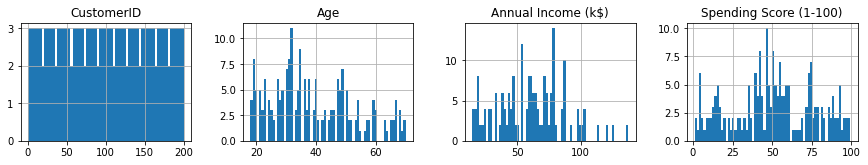

In [9]:
data.hist(figsize=(15,5), layout=(2,4), bins=70)
plt.show()

For the categorical features characteristics are count, cardinality, list of unique values, top and freq.

In [10]:
stats_cat = data.select_dtypes('object').describe()

In [11]:
stats_cat

,Gender
count,200
unique,2
top,Female
freq,112


In [12]:
def uniqueValues(df):
    for column in df:
        unique_values = df[column].unique()
        print(f'Unique values of feature {column} are: {unique_values}')

uniqueValues(data.select_dtypes('object'))

Unique values of feature Gender are: ['Male' 'Female']


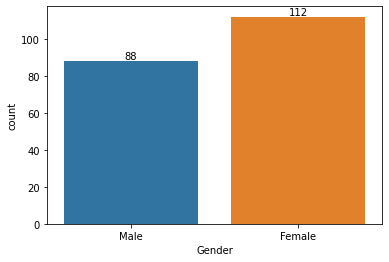

In [13]:
ax = sns.countplot(x=data['Gender'], data=data)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate(f'{p.get_height()}', (x.mean(), y), ha='center', va='bottom')
        
plt.show()

### Bi-variate Analysis

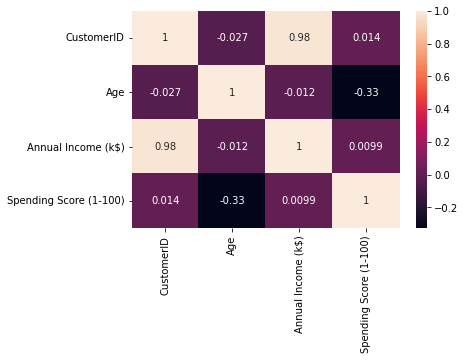

In [14]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

### Multi-variate Analysis

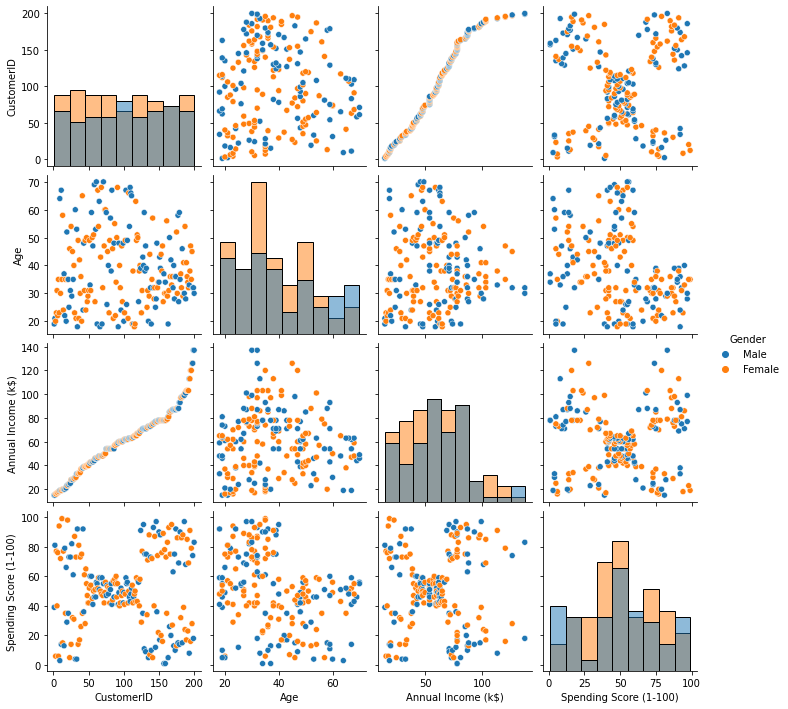

In [18]:
sns.pairplot(data, hue ='Gender', diag_kind='hist')
plt.show()

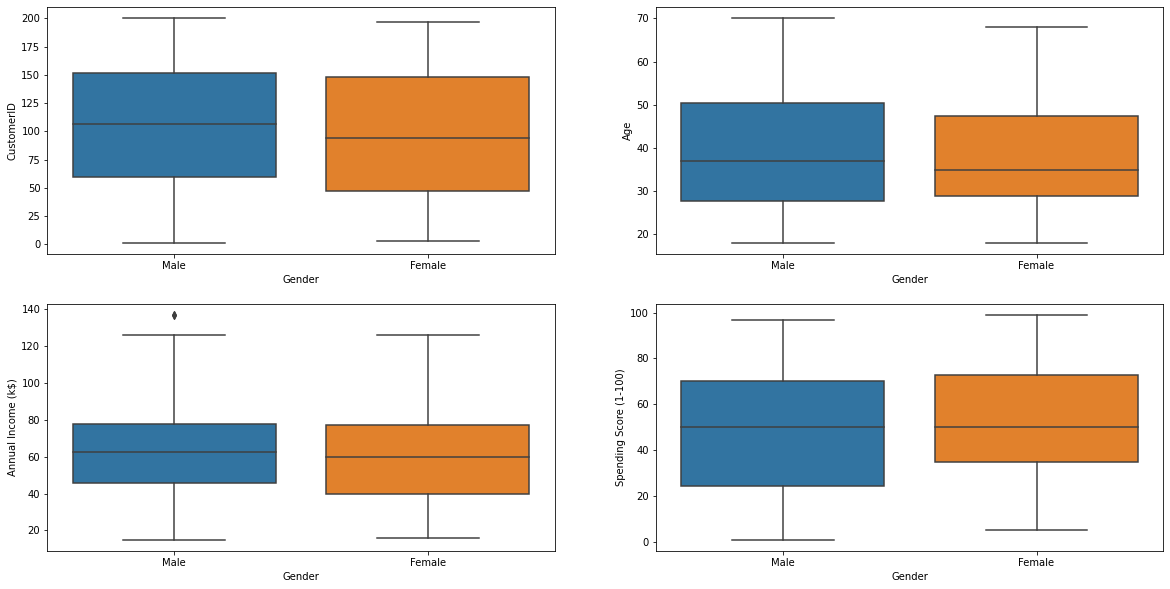

In [19]:
nnum = data.select_dtypes(np.number).shape[1]
cols = 2
rows = 2
fig, axes = plt.subplots(rows, cols, figsize=(20,10))

for ax in axes.flatten():
    ax.set_axis_off()
    
for column, ax in zip(data.select_dtypes(np.number).columns, axes.flatten()):
    sns.boxplot(x=data['Gender'], y=data[column], data=data, ax=ax)
    ax.set_axis_on()
    
plt.show()

## Descriptive statistics

In [17]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Check for missing values

In [20]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

No missing values are found.

## Finding outliers and scaling data

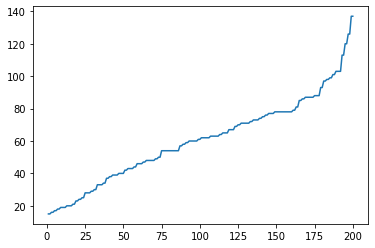

In [21]:
x = data['CustomerID']
y = data['Annual Income (k$)']

plt.plot(x, y)

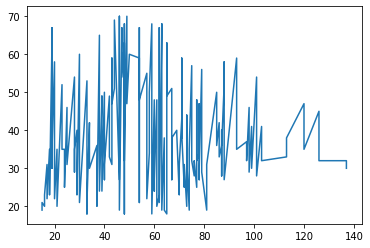

In [22]:
x = data['Annual Income (k$)']
y = data['Age']

plt.plot(x, y)

## Split the data into dependent and independent variables

In [23]:
x = data.iloc[:, [3, 4]].values

print(x.shape)

(200, 2)


## Clustering algorithms

### KMeans clustering

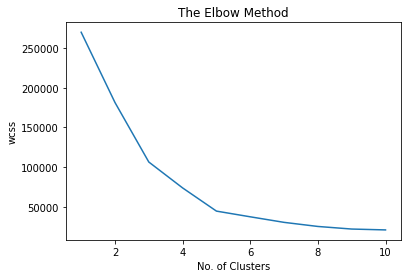

In [24]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  km.fit(x)
  wcss.append(km.inertia_)
  
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

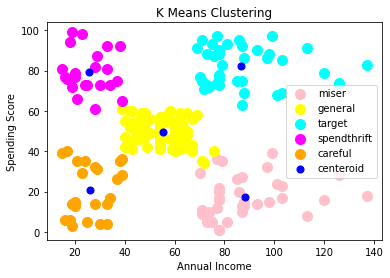

In [25]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('K Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

### Hierarchical clustering

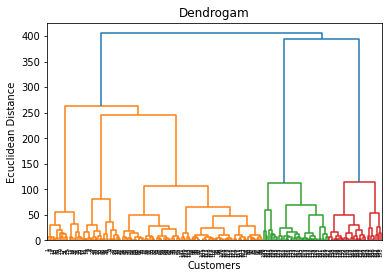

In [26]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam')
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

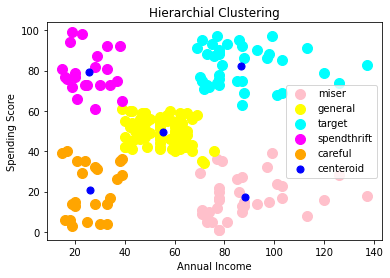

In [27]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Hierarchial Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

### **Clusters of customers based on their ages**

## Build the Model

In [28]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [29]:
x = data.iloc[:, [2, 4]].values
x.shape

(200, 2)

## Train the Model

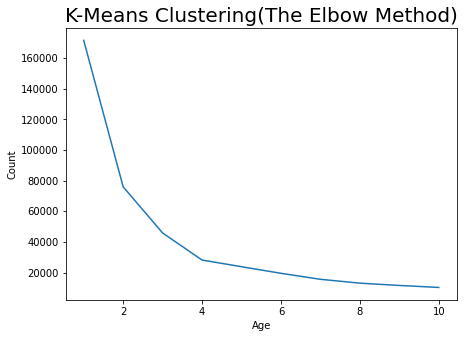

In [30]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (7, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## Test the Model

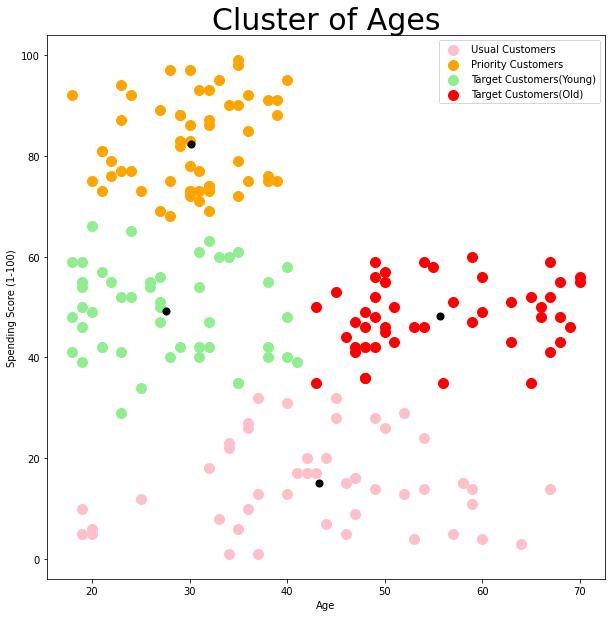

In [31]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Young)')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### **Clusters of customers based on their gender**

## Check for Categorical columns and perform encoding.

In [32]:
data['Gender'].replace(['Male', 'Female'], [0, 1], inplace = True)
data['Gender'].value_counts()

1    112
0     88
Name: Gender, dtype: int64

## Split the data into dependent and independent variables.

In [33]:
x = data.iloc[:, [1, 4]].values
x.shape

(200, 2)

## Train the Model


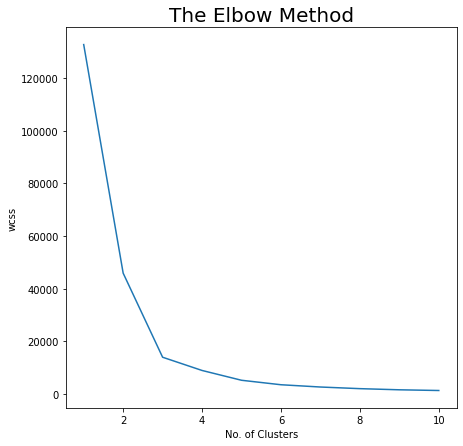

In [34]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
  
plt.rcParams['figure.figsize'] = (7, 7)
plt.title('The Elbow Method', fontsize = 20)
plt.plot(range(1, 11), wcss)
plt.xlabel('No. of Clusters', fontsize = 10)
plt.ylabel('wcss')
plt.show()

## Test the Model

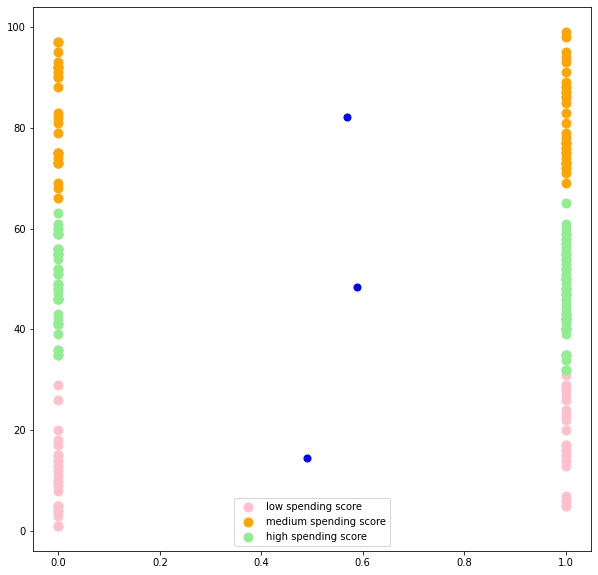

In [35]:
kmeans = KMeans(n_clusters = 3, max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 80, c = 'pink', label = 'low spending score')
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 80, c = 'orange', label = 'medium spending score')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 80, c = 'lightgreen', label = 'high spending score')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 50, color = 'blue')
plt.legend()
plt.show()

From the above cluster plot, we can conclude that males and females belong to all categories (high, low and medium spending score category).